In [149]:
import sys

sys.path.append("../src")

import geopandas as gpd
import numpy as np
from earthdata import utils
import matplotlib
import matplotlib.pyplot as plt
import shapely as sh
from pyproj import CRS
eps4326 = CRS.from_epsg(4326)

# sources

- 10m countries and boundaries from https://www.naturalearthdata.com/downloads/

In [98]:
z = gpd.read_file("/opt/earthdata/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp")
z = z[['geometry', 'SOVEREIGNT', 'SOV_A3', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB']]

In [3]:
arctic_circle = sh.geometry.Polygon([ [-180,66], [180,66], [180,90], [-180,90]])
antarctic_circle = sh.geometry.Polygon([ [-180,-66], [180,-66], [180,-90], [-180,-90]])
z['geometry'] = [i.difference(arctic_circle).difference(antarctic_circle) for i in z.geometry]


In [2]:
z.to_parquet("/opt/earthdata/world-tiles/natural_earth_countries.parquet")

NameError: name 'z' is not defined

In [95]:
z = gpd.read_parquet("/opt/earthdata/natural_earth_countries.parquet")
z.shape

(258, 7)

In [96]:
regions = list(np.unique(z.SUBREGION.values))
regions = {k:i for i,k in enumerate(regions)}
z['region_id'] = [regions[k] for k in z.SUBREGION.values]
colormap = plt.cm.gist_ncar
z['color'] = [matplotlib.colors.rgb2hex(colormap(ri/len(regions))) for ri in z['region_id']]


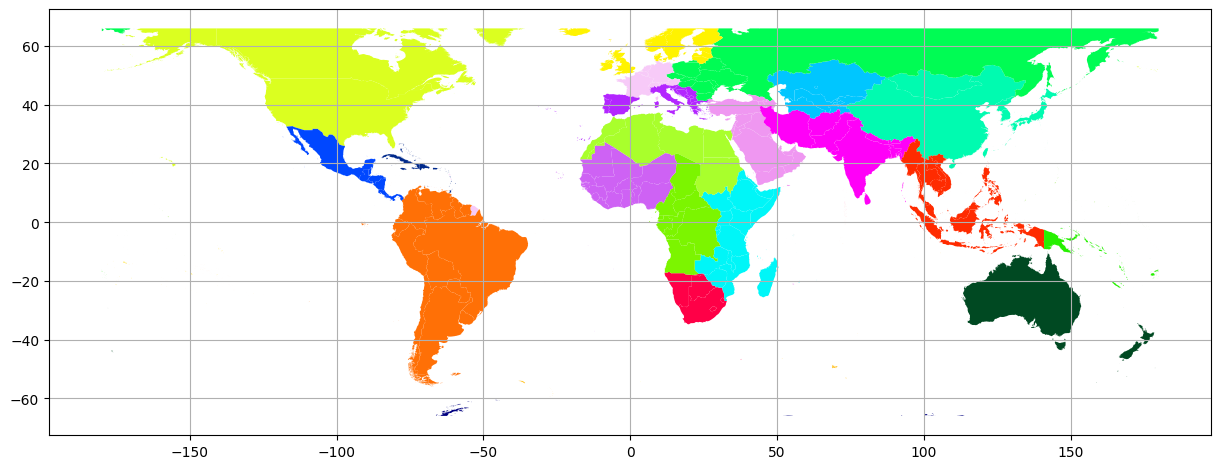

In [97]:
z.plot(color=z['color'], figsize=(15,8))
plt.grid()